In [7]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import pylab

import json
import networkx as nx

# Opening JSON file 
f = open('./parser.json',) 
   
# returns JSON object as  
# a dictionary 
data = json.load(f) 


"""
Podamos los grafo que solo tengan grado 1 ya que hemos partido de un influencer 
inicialy podemos sobreentender que todos siguen a ese (de esta manera ahorramos 
recursos facilitando los calculos)
"""
G = nx.read_gml('./NEW/grafo_con_poda.gml')
G = G.to_undirected()

In [8]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 8273
Número de aristas: 23120


In [4]:
nx.is_connected(G) # Es un grafo conexo

True

In [18]:

import os
import json
import asyncio
from twscrape import API, gather
from twscrape.logger import set_log_level
import nest_asyncio
from collections import defaultdict
from itertools import chain
import random

grados = sorted(G.degree, key=lambda x: x[1], reverse=True)
mas_sociable = grados[:5]
menos_sociable = grados[-5:]

async def main(user_id):
    api = API()  # or API("path-to.db") - default is `accounts.db`

    # Tweet & User model can be converted to regular dict or json, e.g.:
    doc = await api.user_by_id(user_id)  # User
    if doc is not None:
        return doc.username
    return None

print('USUARIOS MENOS SOCIABLES')
for i in menos_sociable:
    print(f"El {i} usuario menos sociable es: {i} {await main(i[0])}") 
print('USUARIOS MÁS SOCIABLES')
for i in mas_sociable:

    print(f"El {i} usuario menos sociable es: {i} {await main(i[0])}") 



USUARIOS MENOS SOCIABLES
El ('2468368237', 2) usuario menos sociable es: ('2468368237', 2) AgustinFierro7
El ('1596199080207826946', 2) usuario menos sociable es: ('1596199080207826946', 2) Maxtether
El ('1563710325232476163', 2) usuario menos sociable es: ('1563710325232476163', 2) St10La
El ('2344171555', 2) usuario menos sociable es: ('2344171555', 2) frankl70305825
El ('835338751979159553', 2) usuario menos sociable es: ('835338751979159553', 2) jqndaga
USUARIOS MÁS SOCIABLES
El ('1740037465761619968', 1293) usuario menos sociable es: ('1740037465761619968', 1293) tedeusd
El ('1761409012602372096', 1151) usuario menos sociable es: ('1761409012602372096', 1151) 2905Hct
El ('1716756536150704129', 1111) usuario menos sociable es: ('1716756536150704129', 1111) benegas_ross
El ('2207026739', 916) usuario menos sociable es: ('2207026739', 916) AlmagroCarina
El ('1702575372078845952', 912) usuario menos sociable es: ('1702575372078845952', 912) RepoLeaks


In [19]:
cliques = list(nx.find_cliques(G))
un_clique = sorted(cliques, key = lambda x: len(x), reverse=True)[0] # Los cliques que forman
print([await main(i) for i in un_clique])

['Ifigenia2024', 'tanochelo3', 'Osofranco', 'VenancioCaro', 'barci_2010']


In [6]:
diccionario_adyacencias = dict(G.adjacency())
lista_aristas = G.edges

# Estadísticas descriptivas de las redes

El objetivo de modelar la realidad en forma de redes complejas no es otro que entender y describir los fenómenos del mundo real de forma cuantitativa y cualitativa. Dicho de otra forma, **extraer conocimiento útil** mediante el análisis de las redes complejas.

Un conjunto de herramientas que nos sirve para alcanzar nuestro objetivo son las estadísticas descriptivas de una red, las cuales se pueden agrupar en:

- Medidas de **conectividad** de la red, que están directa o indirectamente relacionadas con el número de conexiones que tiene un nodo, así como con la estructura global de conexiones de la red.
- Medidas de **_motif_**, que cuentan la frecuencia de subgrafos específicos en una red; o dicho de otra forma, patrones de interconexión que se producen en las redes complejas en números significativamente superiores a los de las redes aleatorias ([fuente](https://www.science.org/doi/10.1126/science.298.5594.824)).
- Medidas de **posición**, relacionadas con el lugar que ocupan los nodos dentro de la red, así como la distancia entre ellos.

Además, en función de su ámbito podemos distinguir entre las medidas a **nivel de nodo**, o **locales**, y las medidas a **nivel de red**, o **globales**.

In [7]:
print(f"Grado medio de la red: {2*G.number_of_edges() / float(G.number_of_nodes()):.4f}")
print(f"Densidad de la red: {(2*G.number_of_edges() / float(G.number_of_nodes())) / float(G.number_of_nodes()):.4f}")


Grado medio de la red: 5.5893
Densidad de la red: 0.0007


<Axes: >

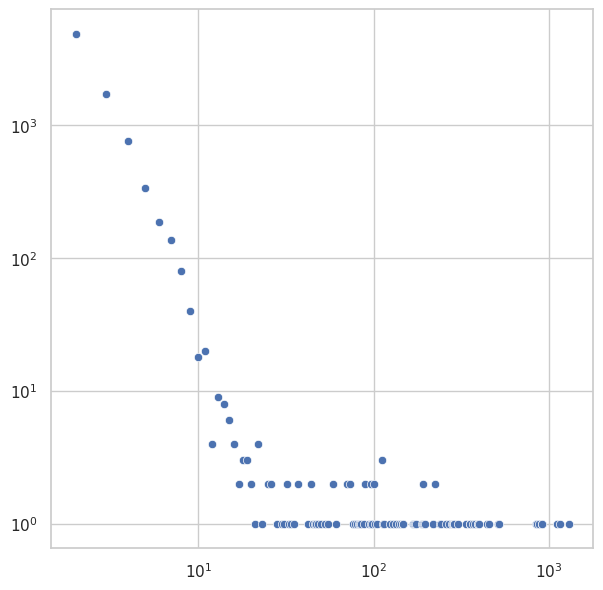

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
"""
    Mostramos la distribucion de los grafos de los nodos con escala logaritmica,
    no he puesto en el poster ya que el grafo que quedaba salia bastante feo...
    Como podemos ver hay bastante varianza en cuanto a la distribución de grados
"""
sns.set_theme(style="whitegrid")
grados = [d for n, d in G.degree()]

grados_ord = sorted(set(grados))
conteo = [grados.count(g) for g in grados_ord]
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.scatterplot(x=grados_ord, y=conteo, ax=ax)

In [9]:
coeficientes_clustering_local = nx.clustering(G) # cuantifica qué tanto esta de interconectado con sus vecinos 
coeficiente_clustering_global = nx.transitivity(G)
print(f"El coeficiente de clustering global es {coeficiente_clustering_global}")

El coeficiente de clustering global es 0.004536677149127547


In [10]:
coeficientes_clustering_local = nx.clustering(G) # cuantifica qué tanto esta de interconectado con sus vecinos 
coeficientes_clustering_local

{'296005272': 0,
 '934902884604563462': 0.0007688197254059477,
 '1771333059620581376': 0,
 '1652770307965370368': 0.5,
 '4234892896': 0,
 '162792550': 0,
 '1707039900380344320': 0,
 '1539766193514577920': 0,
 '1764015689336053760': 0,
 '219874297': 0.6666666666666666,
 '1437515992729522176': 1.0,
 '1164633048': 1.0,
 '1645898915298922498': 0.5,
 '1724241193486200832': 0.4,
 '1749605057971003392': 0.5,
 '1759648797095796736': 0,
 '1607889636453408771': 1.0,
 '1579195628097249280': 1.0,
 '758426769414389762': 0,
 '1701015358059188224': 0.3333333333333333,
 '1424028751': 0.4642857142857143,
 '1188316369172996097': 0,
 '1718927930376536065': 0,
 '2525964123': 0,
 '1409356198177030145': 0,
 '1273385644274876417': 0,
 '1740037465761619968': 0.0024602587402038603,
 '1605945239763574786': 0,
 '1491394764': 0,
 '1215378157253091329': 0,
 '1724114569281277952': 0,
 '38570287': 0,
 '1382839652': 0,
 '1635179996': 0,
 '896488776809291780': 0,
 '1201567110': 0.029885057471264367,
 '1636169816393252

In [11]:
l = dict(nx.all_pairs_shortest_path_length(G)) #DICCIONARIO CAMINO MÁS CORTO

In [12]:
diametro = nx.diameter(G)
print(f"El diámetro de la red es {diametro}")

El diámetro de la red es 13


In [13]:
excentricidad = nx.eccentricity(G, sp=l) # camino más largo que se puede realizar desde cada nodo

/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


El camino geodésico medio es: 4.31


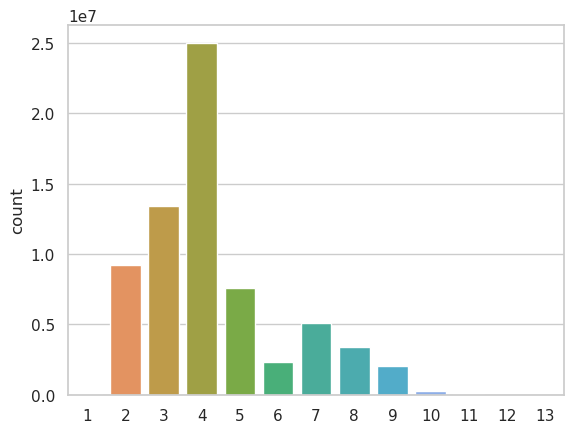

In [14]:
caminos = []
for i in l.keys():
    for j in l[i].keys():
        if l[i][j] != 0:
            caminos.append(l[i][j])

sns.countplot(x=caminos, palette = 'cubehelix_palette' )

"""
    métrica a nivel global de la distancia media entre cualquier par de nodos seleccionados aleatoriamente
"""

print(f"El camino geodésico medio es: {nx.average_shortest_path_length(G):.2f}")

/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


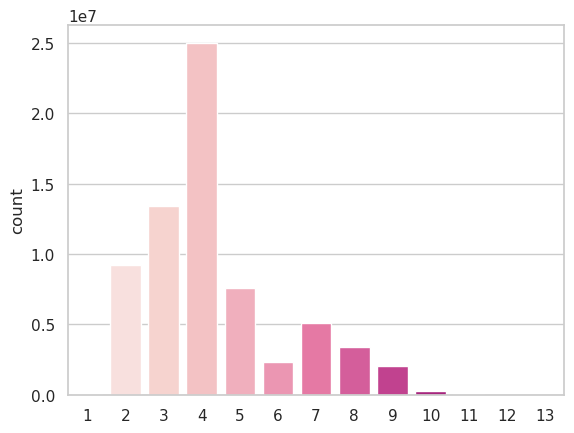

In [54]:
fig = sns.countplot(x=caminos, palette = 'RdPu' )
fig.figure.savefig("camino_geodesico.png") 


In [15]:
len(list(nx.connected_components(G))) # Es un grafo conexo, forma una única componente conexa

1

In [16]:
print("Número de nodos:", G.number_of_nodes())
print("Número de aristas:", G.number_of_edges())

Número de nodos: 8273
Número de aristas: 23120


In [17]:
"""determinar si el comportamiento de nuestros datos han seguido un proceso aleatorio o no
Para ello calculamos el coeficiente de clustering medio, el grado medio y la densidad. Esto solo
nos dará una idea de la cercanía entre nuestra red y una aleatoria, comprobando si el histograma es 
parecido al de Possion sacaremos conclusiones más acertadas """
import numpy as np 
k = np.mean(grados)
n = G.number_of_nodes()

print(f"Coef. de clustering medio de la red: {nx.transitivity(G)}") 
print(f"Coef. de clustering medio de una red ER: {nx.transitivity(nx.erdos_renyi_graph(n, k/(n-1)))}") #coeficiente para una red ER con el mismo nº de nodos y un parámetro de probabilidad ajustado para que el grado medio sea similar al de la red de karate. 

print("\n")
print(f"Grado medio de la red: {2*G.number_of_edges() / float(G.number_of_nodes()):.4f}")
print(f"Grado medio de una red ER: {2*(nx.erdos_renyi_graph(n, k/(n-1))).number_of_edges() / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes()):.4f}")

print("\n")
print(f"Densidad de la red: {(2*G.number_of_edges() / float(G.number_of_nodes())) / float(G.number_of_nodes()):.4f}")
print(f"Densidad de una red ER: {(2*(nx.erdos_renyi_graph(n, k/(n-1))).number_of_edges() / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes())) / float((nx.erdos_renyi_graph(n, k/(n-1))).number_of_nodes()):.4f}")

Coef. de clustering medio de la red: 0.004536677149127547
Coef. de clustering medio de una red ER: 0.0006404635736342496


Grado medio de la red: 5.5893
Grado medio de una red ER: 5.5349


Densidad de la red: 0.0007
Densidad de una red ER: 0.0007


/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/pandita/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


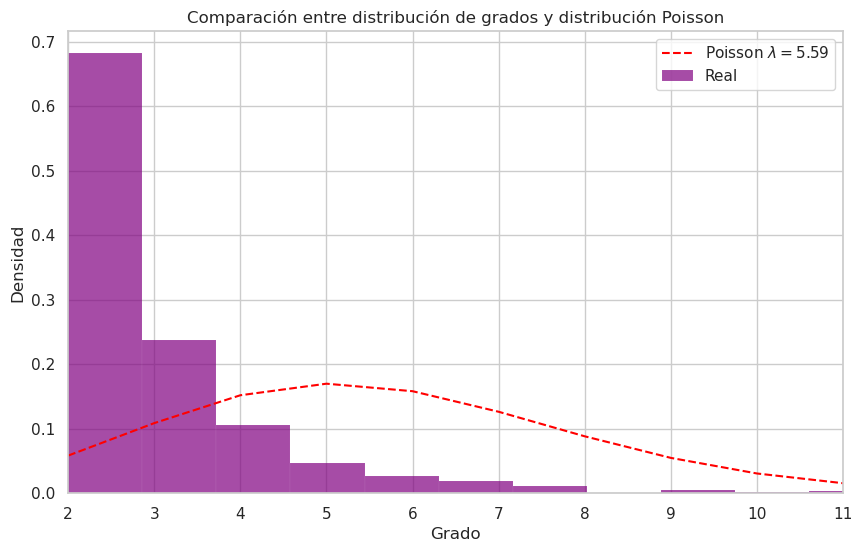

In [47]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Calculamos la media de los grados
media = np.mean(grados)

# Configuración de estilo en Seaborn
sns.set(style="whitegrid")

# Creamos el histograma de los grados de la red
plt.figure(figsize=(10, 6))
sns.histplot(grados, kde=False, bins=1500, stat="density", label='Real', color='purple', alpha=0.7)

# Creamos los valores de la distribución Poisson
xs = np.arange(min(grados), max(grados) + 1)
poisson_pmf = stats.poisson.pmf(xs, media)

# Graficamos la distribución Poisson
sns.lineplot(x=xs, y=poisson_pmf, color='red', linestyle='--', label=f'Poisson $\lambda={media:.2f}$')

# Configuramos los títulos y etiquetas
plt.title('Comparación entre distribución de grados y distribución Poisson')
plt.xlabel('Grado')
plt.ylabel('Densidad')
plt.legend(loc="upper right")
plt.xlim(2, 11)


"""
Comparamos la distribución de nuestro grafo con un grafo aleatorio
"""
plt.savefig('grafico.png')

# Mostramos la gráfica
plt.show()


In [20]:
# Aplicar un algoritmo de detección de comunidades (por ejemplo, Louvain)
comunidades = nx.algorithms.community.modularity_max.greedy_modularity_communities(G) #el algoritmo de louvain encuentra comunidades maximizando la modularidad

# Mostrar el número de comunidades identificadas
print("Número de comunidades encontradas:", len(comunidades))

# Mostrar los nodos en cada comunidad
for i, comunidad in enumerate(comunidades):
    print(f"Comunidad {i+1}: {len(comunidad)} nodos")
    print("Nodos:")
    #for node in comunidad:
    #    print(node)
    print() 

Número de comunidades encontradas: 12
Comunidad 1: 3146 nodos
Nodos:

Comunidad 2: 1642 nodos
Nodos:

Comunidad 3: 1555 nodos
Nodos:

Comunidad 4: 668 nodos
Nodos:

Comunidad 5: 541 nodos
Nodos:

Comunidad 6: 306 nodos
Nodos:

Comunidad 7: 203 nodos
Nodos:

Comunidad 8: 157 nodos
Nodos:

Comunidad 9: 40 nodos
Nodos:

Comunidad 10: 9 nodos
Nodos:

Comunidad 11: 3 nodos
Nodos:

Comunidad 12: 3 nodos
Nodos:



In [ ]:
"""
CONCLUSIONES:
acerca de las conclusiones queremos destacar la gran presencia de bots o de perfiles estilo
sigueme y te sigo que inundan twitter

Tenemos una menor cantidad de datos en relación a los perfiles que siguen cada seguidor del influencer
pero destacamos que existe una relación temática. Si sigues a un programador es más probable que sigas a otros
programadores también y eso se puede realizar con el archivo sacar_datos_2 ya que en un primer 
instante nos habíamos fijado más en analizar la tendencia de los seguidores que siguen a dichos seguidores.

Sacando todos los datos que necesitamos es mucho más evidente la tendencia que hay pero por limitaciones
de recursos consideramos mejor ceñirnos a lo que tenemos

Acerca de los nodos más improtantes obviamente habría que destacar el nodo principal sería el de Hola Mundo
que es de donde partimos. En segundo lugar debido a falta de más información debemos destacar a todos los perfiles de sigueme y te sigo
que (para mi desgracia) han sido probados como un método efectivo para aumentar el número de seguidores.
En tercer lugar sería interesante mencionar a los perfiles de otros programadores que aunque no fueron tan relevantes
debido a la poca cantidad de datos que hemos sacado en base a lo que hemos podido invertigar acerca de los perfiles
crean una comunidad con intereses en común
"""